# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
from citipy import citipy
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 641


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mangan
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | juba
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | kautokeino
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | merauke
Processing Record 20 of Set 1 | nurota


Processing Record 35 of Set 4 | kambove
Processing Record 36 of Set 4 | clyde river
Processing Record 37 of Set 4 | ust-nera
Processing Record 38 of Set 4 | marathon
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | brae
Processing Record 41 of Set 4 | guangyuan
Processing Record 42 of Set 4 | benjamin constant
Processing Record 43 of Set 4 | bambous virieux
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | quatre cocos
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | amga
Processing Record 49 of Set 4 | ngorongoro
Processing Record 0 of Set 5 | te anau
Processing Record 1 of Set 5 | boguchany
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | matameye
City not found. Skipping...
Processing Record 4 of Set 5 | hay river
Processing Record 5 of Set 5 | kathu
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | joutseno
Processing Record 8 o

Processing Record 25 of Set 8 | amderma
City not found. Skipping...
Processing Record 26 of Set 8 | cockburn town
Processing Record 27 of Set 8 | port angeles
Processing Record 28 of Set 8 | kloulklubed
Processing Record 29 of Set 8 | pingliang
Processing Record 30 of Set 8 | marystown
Processing Record 31 of Set 8 | kashi
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | yuxia
Processing Record 34 of Set 8 | boende
Processing Record 35 of Set 8 | banjar
Processing Record 36 of Set 8 | babanusah
City not found. Skipping...
Processing Record 37 of Set 8 | khao wong
Processing Record 38 of Set 8 | marzuq
Processing Record 39 of Set 8 | kumano
Processing Record 40 of Set 8 | kutum
Processing Record 41 of Set 8 | general roca
Processing Record 42 of Set 8 | bubaque
Processing Record 43 of Set 8 | seoul
Processing Record 44 of Set 8 | kita
Processing Record 45 of Set 8 | pontes e lacerda
Processing Record 46 of Set 8 | pandamatenga
Processing Record 47 of Set 8 | 

Processing Record 10 of Set 12 | saltillo
Processing Record 11 of Set 12 | marawi
Processing Record 12 of Set 12 | warmbad
Processing Record 13 of Set 12 | moanda
Processing Record 14 of Set 12 | lompoc
Processing Record 15 of Set 12 | diego de almagro
Processing Record 16 of Set 12 | zhanaozen
Processing Record 17 of Set 12 | adrar
Processing Record 18 of Set 12 | bull savanna
Processing Record 19 of Set 12 | seidu
Processing Record 20 of Set 12 | omboue
Processing Record 21 of Set 12 | avera
Processing Record 22 of Set 12 | lao cai
Processing Record 23 of Set 12 | tshela
Processing Record 24 of Set 12 | scituate
Processing Record 25 of Set 12 | pochutla
Processing Record 26 of Set 12 | mont-dore
Processing Record 27 of Set 12 | beihai
Processing Record 28 of Set 12 | ranong
Processing Record 29 of Set 12 | general higinio morinigo
Processing Record 30 of Set 12 | gumdag
Processing Record 31 of Set 12 | dera bugti
Processing Record 32 of Set 12 | copiapo
Processing Record 33 of Set 12

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mangan,27.5167,88.5333,16.45,83,97,1.58,IN,1680545267
1,rikitea,-23.1203,-134.9692,26.53,82,79,5.54,PF,1680544955
2,inhambane,-23.8650,35.3833,22.98,79,0,3.76,MZ,1680545268
3,punta arenas,-53.1500,-70.9167,19.06,32,75,9.26,CL,1680545268
4,hermanus,-34.4187,19.2345,16.00,81,80,1.99,ZA,1680544967


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mangan,27.5167,88.5333,16.45,83,97,1.58,IN,1680545267
1,rikitea,-23.1203,-134.9692,26.53,82,79,5.54,PF,1680544955
2,inhambane,-23.8650,35.3833,22.98,79,0,3.76,MZ,1680545268
3,punta arenas,-53.1500,-70.9167,19.06,32,75,9.26,CL,1680545268
4,hermanus,-34.4187,19.2345,16.00,81,80,1.99,ZA,1680544967


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

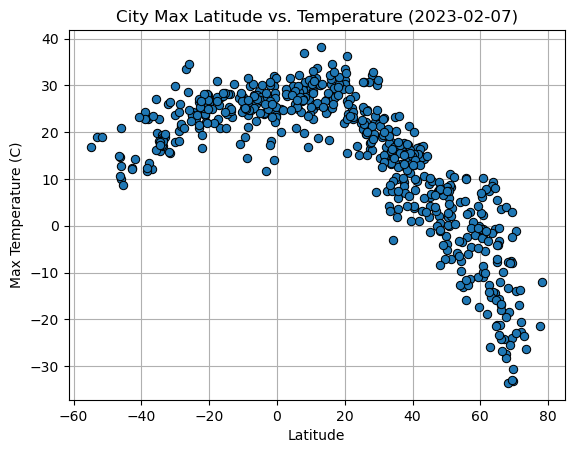

In [11]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

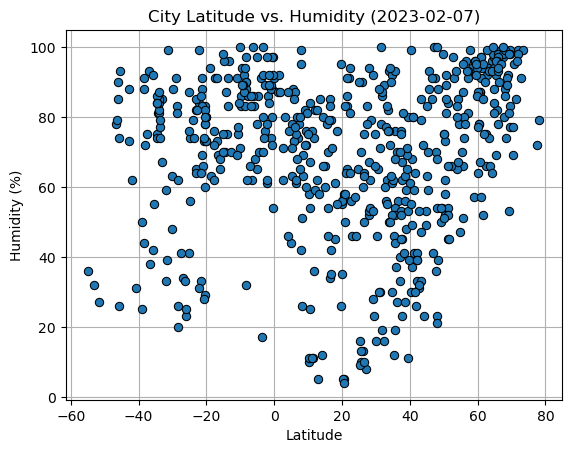

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

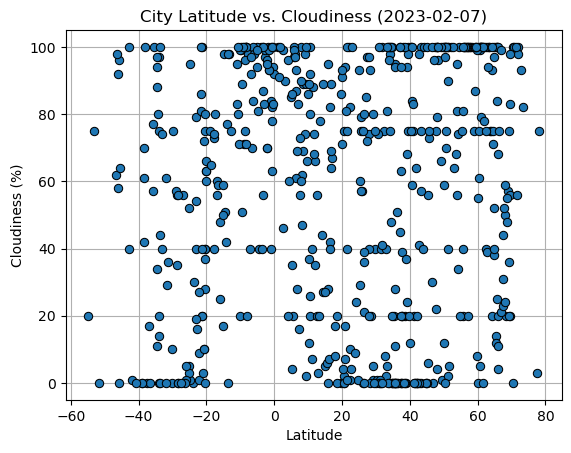

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

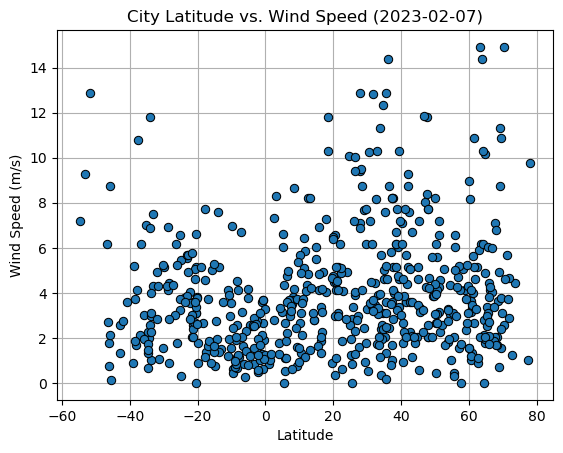

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mangan,27.5167,88.5333,16.45,83,97,1.58,IN,1680545267
5,juba,4.8517,31.5825,29.78,44,85,3.13,SS,1680545268
8,yellowknife,62.4560,-114.3525,-12.71,66,40,1.03,CA,1680544690
10,vila franca do campo,37.7167,-25.4333,15.23,62,39,2.84,PT,1680545157
11,longyearbyen,78.2186,15.6401,-12.09,79,75,9.77,SJ,1680544727


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,26.53,82,79,5.54,PF,1680544955
2,inhambane,-23.8650,35.3833,22.98,79,0,3.76,MZ,1680545268
3,punta arenas,-53.1500,-70.9167,19.06,32,75,9.26,CL,1680545268
4,hermanus,-34.4187,19.2345,16.00,81,80,1.99,ZA,1680544967
6,mataura,-46.1927,168.8643,14.71,85,92,0.73,NZ,1680544722


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7940625294736229


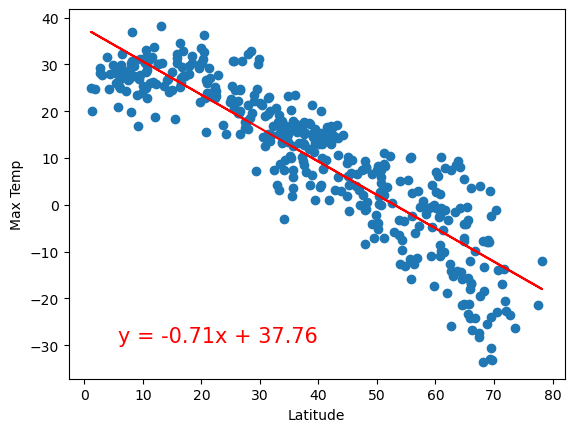

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.3304047843023295


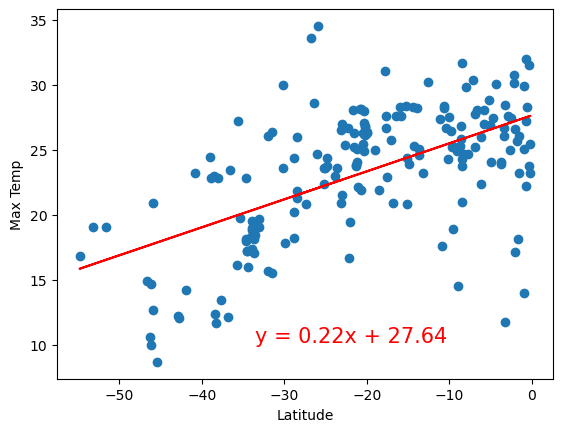

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:

Northern Hemisphere:

The relationship between latitude and max tempuratures displays a strong negative correlation.
The r-value is ~ 0.77 (rounded up)
Max temperature drops as the latitude increases.
Southern Hemisphere:

There is no correlation between latitude and max tempuratures
The r-value is ~ 0.16 (rounded up)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12556152993846387


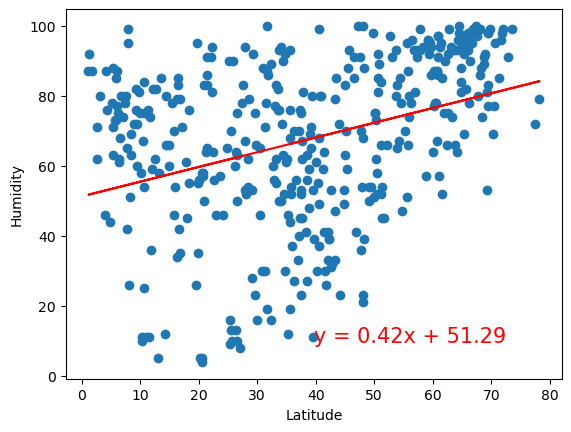

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.10773134445123626


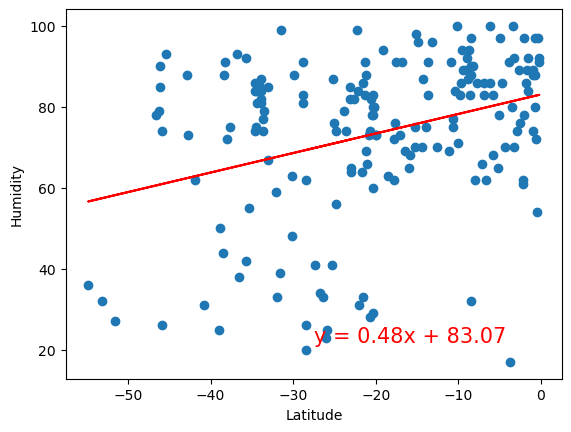

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship:
Northern Hemisphere:

There is no correlation between latitude and humidity
The r-value is ~ 0.18 (rounded up)
Southern Hemisphere:

There is no correlation between latitude and humidity
The r-value is ~ 0.1 (rounded up)


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01403111041117245


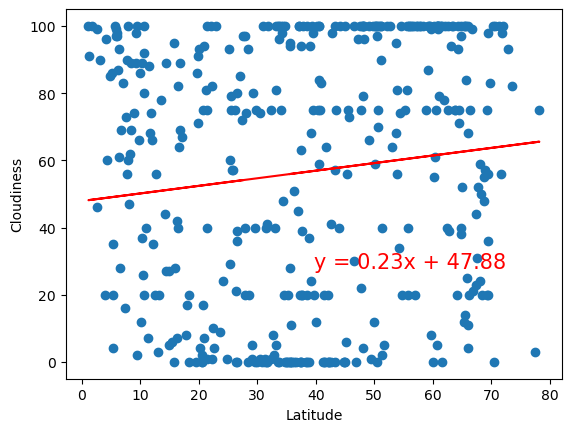

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.19607087750696403


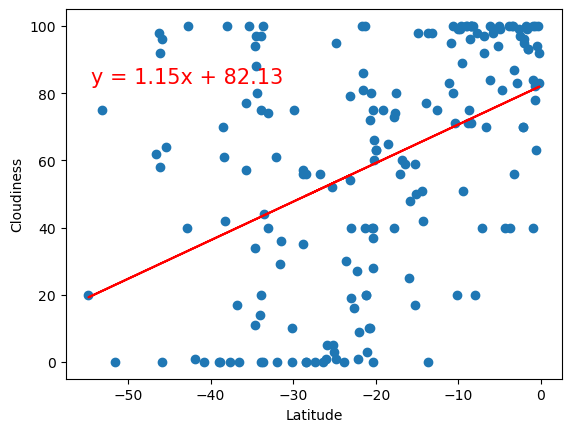

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:
Northern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.05 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.19 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0024732973503659886


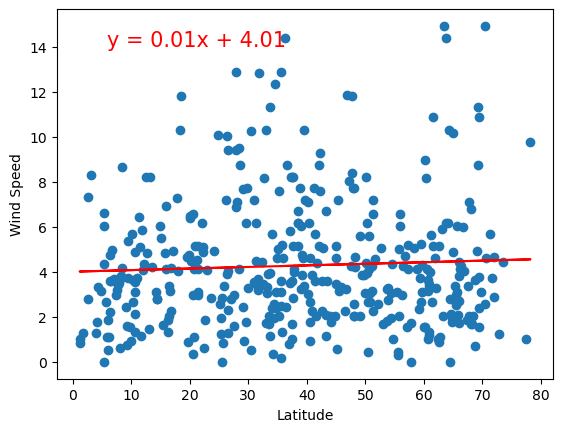

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.1324469501281696


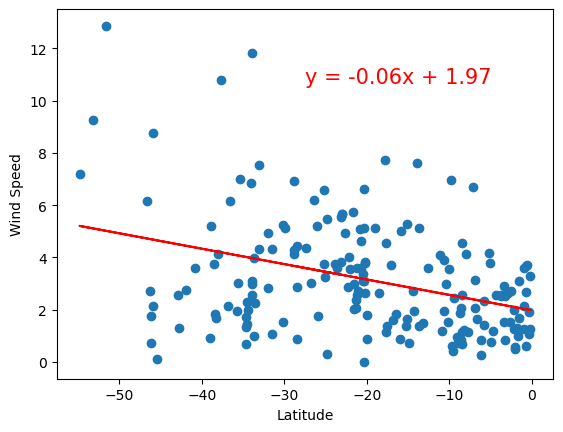

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:

Northern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.01 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.09 (rounded up)